**1**. (100 points)

Implement the Drossel and Schwabl forest fire model using the [description](https://en.wikipedia.org/wiki/Forest-fire_model#/media/File:Forest_fire_model.gif) from Wikipedia

```
The model is defined as a cellular automaton on a grid with Ld cells. L is the sidelength of the grid and d is its dimension. A cell can be empty, occupied by a tree, or burning. The model of Drossel and Schwabl (1992) is defined by four rules which are executed simultaneously:
A burning cell turns into an empty cell
A tree will burn if at least one neighbor is burning
A tree ignites with probability f even if no neighbor is burning
An empty space fills with a tree with probability p
```

- Parameters for the simulation are
```python
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps
```
- You need to write code create an array named `sim` with shape (steps, n, n)
- **Note**: Your code should make use of `numpy` optimizations as much as possible - the simulation itself takes less than a second to complete on my fairly old desktop
- Now create a plot as shown from the `sims` array
![](./forest_fire.png)
- Code to display an animation of the `sims` array is provided
- Your animation should be similar to the one shown

Hints:

- For simplicity, assume that the borders of the simulation grid are fixed so they are always empty (the borders are *outside* the 100 by 100 grid you are saving at each step.
- Use marginalization to get the required numbers for the plot of population sizes over time
- Use *views* liberally - they do not incur the cost of a copy


In [1]:
from IPython.display import Video

Video("forest_fire.mp4")

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
np.random.seed(123)

In [114]:
EMPTY, TREE, BURN = 0, 1, 2

In [115]:
steps = 200  # Number of steps
p = 0.03     # Probability of EMPTY -> TREE
f = p * 0.01 # Probability of TREE -> FIRE
n = 200      # Length of square grid
steps = 200  # Number of simulation steps

In [116]:
%%time

# Your code to generate the `sim` array here.
sim = np.zeros((steps, n, n))
Z = np.zeros((n+2, n+2))
sim[0] = Z[1:-1,1:-1]

def iterate(Z):
    N = (Z[ :-2, :-2] >= 2) | (Z[ :-2, 1:-1] >= 2) | (Z[ :-2, 2:] >= 2) | (Z[1:-1, :-2] >= 2) | (Z[1:-1, 2:] >= 2) | \
    (Z[2:  , :-2] >= 2) | (Z[2:  , 1:-1] >= 2) | (Z[2:  , 2:] >= 2)
    
    empty = (Z[1:-1, 1:-1] == BURN)
    tree = ((Z[1:-1, 1:-1] == EMPTY) & (np.random.random((n,n)) <= p)) | ((Z[1:-1, 1:-1] == TREE) & (np.random.random((n,n)) >= f))
    burn = (N & (Z[1:-1, 1:-1] == TREE)) | ((Z[1:-1, 1:-1] == TREE) & (np.random.random((n,n)) <= f))
    
    Z_ = np.zeros((n+2,n+2))
    Z_[1:-1, 1:-1][tree] = TREE
    Z_[1:-1, 1:-1][burn] = BURN
    #Z_[1:-1, 1:-1][empty] = EMPTY
    
    return Z_
    
for ii in range(1, steps):
    Z = iterate(Z)
    sim[ii] = Z[1:-1,1:-1].copy()

CPU times: user 366 ms, sys: 17.5 ms, total: 383 ms
Wall time: 382 ms


In [117]:
empty_count_list = []
tree_count_list = []
burn_count_list = []
for ii in range(steps):
    empty_count_list.append(np.count_nonzero(sim[ii] == 0))
    tree_count_list.append(np.count_nonzero(sim[ii] == 1))
    burn_count_list.append(np.count_nonzero(sim[ii] == 2))

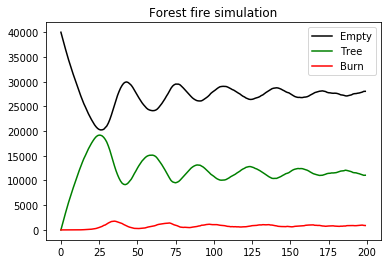

In [118]:
t = np.arange(0., 200.)
plt.plot(t, empty_count_list,'k', label='Empty')
plt.plot(t, tree_count_list, 'g', label='Tree')
plt.plot(t, burn_count_list, 'r', label='Burn')
plt.title('Forest fire simulation')
plt.legend()

# Check movie

If your `sim` array is correct, the animation will play upon execution. It takes a bit of time (< 1 minute) to genreate the animation and render to HTML.

In [119]:
%%capture

fig = plt.figure(figsize=(6,6))
im = plt.imshow(sim[0], cmap=ListedColormap(['black', 'green', 'red']), vmin=0, vmax=2)

def updatefig(j):
    im.set_array(sim[j])
    return [im]

ani = animation.FuncAnimation(fig, updatefig, frames=range(steps), 
                              interval=50, blit=True);

In [120]:
%%time

HTML(ani.to_jshtml())

CPU times: user 44.4 s, sys: 426 ms, total: 44.8 s
Wall time: 11.3 s


To write to file if you have ffmpeg instaled

```python 
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('forest_fire.mp4', writer=writer)
```